<a href="https://colab.research.google.com/github/medeirosleandro/portifolio_data_science/blob/main/Estudo_Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

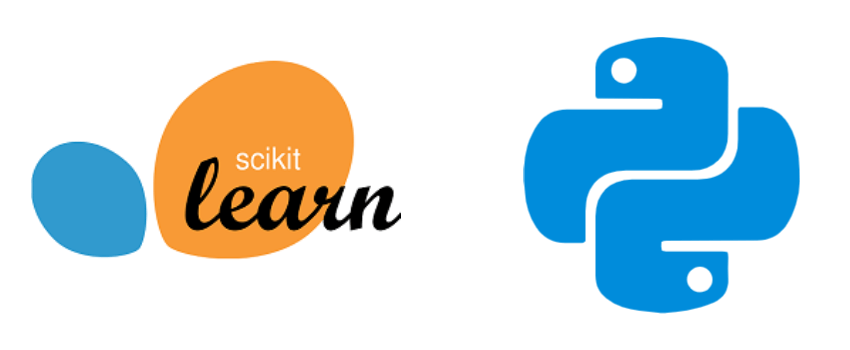


###Existem várias bibliotecas Python que fornecem implementações sólidas de uma variedade de algoritmos de aprendizado de máquina. Um dos mais conhecidos é o Scikit-Learn, um pacote que fornece versões eficientes de um grande número de algoritmos comuns. O Scikit-Learn é caracterizado por uma API limpa, uniforme e simplificada, bem como por uma documentação online muito útil e completa. [Link para Documentação](https://scikit-learn.org/stable/)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
DATA_PATH = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv" 

iris = pd.read_csv(DATA_PATH)
iris = sns.load_dataset('iris')

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


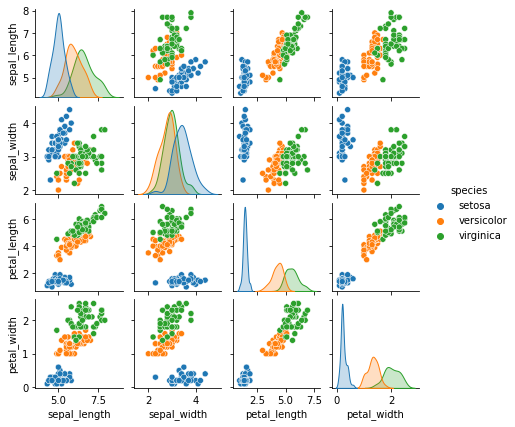

In [3]:
sns.pairplot(iris, hue='species', size=1.5);

In [4]:
#dropar a coluna species
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [5]:
y_iris = iris['species']
y_iris.shape

(150,)

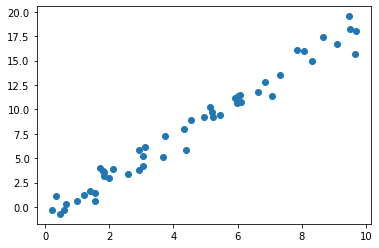

In [6]:
# Aprendizado Supervisionado
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x,y);

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
X = x[:, np.newaxis]
X.shape

(50, 1)

In [10]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
model.coef_

array([1.9776566])

In [12]:
model.intercept_

-0.9033107255311146

In [13]:
xfit = np.linspace(-1,11)

In [14]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

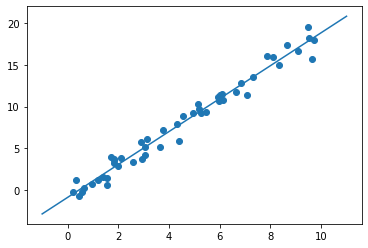

In [15]:
plt.scatter(x,y)
plt.plot(xfit, yfit);

In [16]:
#Aprendizado Não supervisionado (Dimensionality)
from sklearn.decomposition import PCA

model = PCA(n_components=2)
model.fit(X_iris)
X_2D = model.transform(X_iris)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


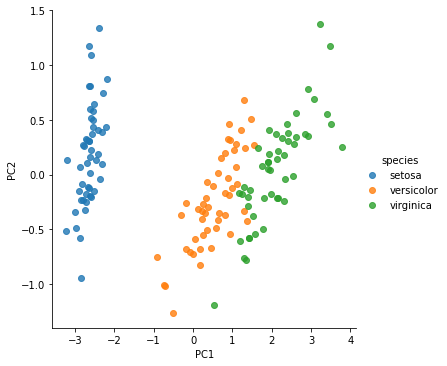

In [17]:
iris['PC1'] = X_2D[:, 0]
iris['PC2'] = X_2D[:, 1]

sns.lmplot("PC1","PC2", hue = 'species', data=iris, fit_reg=False);

In [18]:
#Aprendizado Não supervisionado(Clustering)

from sklearn import mixture

model = mixture.GaussianMixture(n_components=3, covariance_type='full')
model.fit(X_iris)
y_gmm = model.predict(X_iris)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.tight_layout>

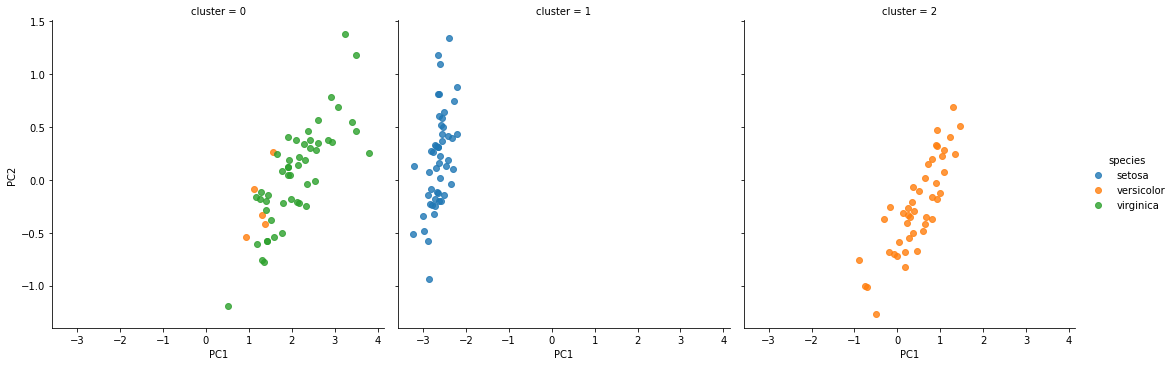

In [19]:
iris['cluster'] = y_gmm
sns.lmplot("PC1","PC2", data = iris, hue = "species",
           col = 'cluster', fit_reg=False);
plt.tight_layout

In [20]:
# Aplicação: Explorando Dígitos Escritos à Mão

from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

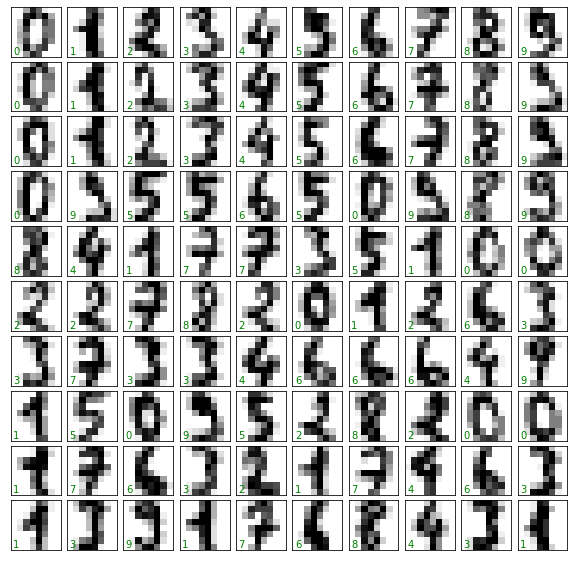

In [21]:
fig, axes = plt.subplots(10,10, figsize=(10,10),
                         subplot_kw={'xticks':[],'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate (axes.flat):
  ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
  ax.text(0.05, 0.05, str(digits.target[i]),
          transform=ax.transAxes, color='green')


In [24]:
# Vemos aqui que existem 1.797 samples e 64 features.
X = digits.data
X.shape

(1797, 64)

In [23]:
y = digits.target
y.shape

(1797,)

In [26]:
# Aprendizagem não supervisionada: redução da dimensionalidade

from sklearn.manifold import Isomap

iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

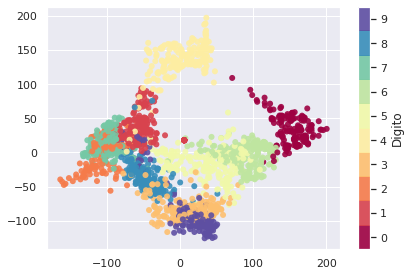

In [57]:
# Vemos que os dados projetados agora são bidimensionais. Vamos plotar esses dados para ver se podemos aprender alguma coisa com sua estrutura:
sns.set()
plt.scatter(data_projected[:,0], data_projected[:,1], c = digits.target,
            edgecolor='none', alpha=0.9,
            cmap=plt.cm.get_cmap('Spectral',10))
plt.colorbar(label="Digito", ticks=range(10))
plt.clim(-0.5, 9.5)
plt.tight_layout()

In [62]:
# Classificação dos Dígitos
# Aplicando um algoritmo de classificação aos dígitos.

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

##Mesmo com este modelo extremamente simples, encontramos cerca de 80% de precisão para classificação dos dígitos! No entanto, este único número não nos diz onde erramos - uma boa maneira de fazer isso é usar a confusion_matrix em conjunto com Seaborn para visulização.

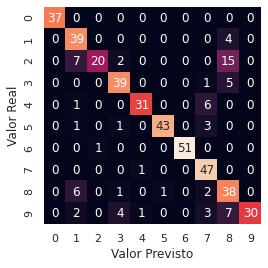

In [67]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar= False)
plt.xlabel('Valor Previsto')
plt.ylabel('Valor Real');

Isso nos mostra onde os pontos mal rotulados tendem a estar: por exemplo, um grande número de dois aqui são mal classificados como um ou oitos